# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Import Dataset

In [2]:
df = pd.read_csv('supershop.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,49.000000,50.000000
mean,73721.615600,121344.639600,215331.732449,112012.639200
std,45902.256482,28017.802755,119665.391550,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,134050.070000,90138.902500
50%,73051.080000,122699.795000,214634.810000,107978.190000
75%,101602.800000,144842.180000,299737.290000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        49 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [7]:
# drop the NaN values

df.dropna(inplace=True) # by default dropped on raw basis

In [8]:
df.isnull().sum() 

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [9]:
df.shape

(49, 5)

# Encoding

In [10]:
df.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    df[column] = le.fit_transform(df[column])

In [13]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# Define x and y

In [18]:
x = df.drop(['Profit'], axis=1).values
y = df['Profit'].values

# Split the dataset in training set and testing set

In [19]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y,train_size=0.7,random_state=42)

In [20]:
print(x)

[[1.1452361e+05 1.3689780e+05 4.7178410e+05 1.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 2.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 1.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 2.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 1.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 2.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 1.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 2.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 0.0000000e+00]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 2.0000000e+00]
 [9.1992390e+04 1.3549507e+05 2.5266493e+05 0.0000000e+00]
 [1.1994324e+05 1.5654742e+05 2.5651292e+05 2.0000000e+00]
 [1.6534920e+05 1.2261684e+05 2.6177623e+05 1.0000000e+00]
 [7.8013110e+04 1.2159755e+05 2.6434606e+05 0.0000000e+0

In [21]:
print(y) 

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  118474.03 111313.02
 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31 103282.38
 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8   96479.51
  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83  71498.49
  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41  14681.4 ]


# Train the model on the training set

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(xtrain, ytrain)

LinearRegression()

# Predict the test results

In [25]:
pred_y = lr.predict(xtest)
print(pred_y)

[128114.41501336  79061.69720621  40650.63862522  44167.18088736
 133174.83964151  97860.20214316 127875.64548512 103550.69373795
  86394.31962766 123619.41286819 127545.03651027 168043.55486011
  93169.21343747 151841.83464713 173033.68073732]


In [26]:
lr.predict([[114523.61, 136897.80, 471784.10, 1]]) # comparing to first y value

array([167142.67207188])

# Evaluate the model

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest, pred_y) *100

89.70635060978623

# Plot the results

Text(0.5, 1.0, 'Value Comparison')

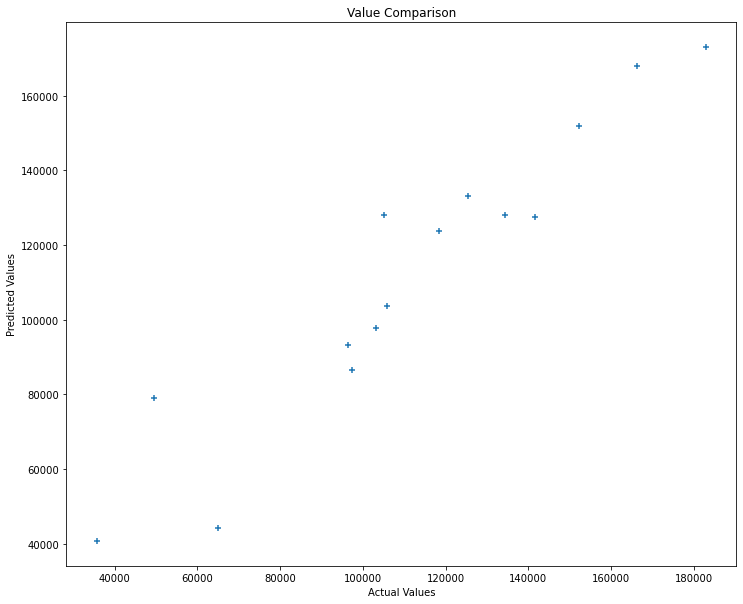

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(ytest, pred_y, marker='+')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Value Comparison')

# Actual & Predict the values and their Differences

In [29]:
df_pred_y = pd.DataFrame({'Actual Values': ytest, 'Predicted Values': pred_y, 'Differences': ytest - pred_y })
df_pred_y[:30]

,Actual Values,Predicted Values,Differences
0,134307.35,128114.415013,6192.934987
1,49490.75,79061.697206,-29570.947206
2,35673.41,40650.638625,-4977.228625
3,64926.08,44167.180887,20758.899113
4,125370.37,133174.839642,-7804.469642
5,103282.38,97860.202143,5422.177857
6,105008.31,127875.645485,-22867.335485
7,105733.54,103550.693738,2182.846262
8,97427.84,86394.319628,11033.520372
9,118474.03,123619.412868,-5145.382868


In [30]:
lr.intercept_

38663.952720280286

In [31]:
lr.coef_

array([ 5.80191202e-01,  4.17271375e-02,  1.20410322e-01, -4.86900268e+02])

In [32]:
lr.score(x,y)

0.8974160194791266